In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_data,drug_data,on ="Mouse ID" ,how = 'outer')
# Display the data table for preview

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [11]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#groupby_drug_time = 

tumor_response = combined_data.groupby(("Drug","Timepoint"))["Tumor Volume (mm3)"].mean()
# Convert to DataFrame

tumor_response_df = tumor_response.reset_index()
tumor_response_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

stderror_response = combined_data.groupby(("Drug","Timepoint"))["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

stderror_response_df = stderror_response.reset_index()
# Preview DataFrame

stderror_response_df.head(6)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642


In [13]:
# Minor Data Munging to Re-Format the Data Frames

tumor_response_df = tumor_response_df.pivot(index='Timepoint',columns = "Drug",values= "Tumor Volume (mm3)")

tumor_response_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


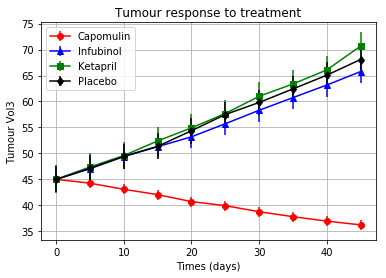

In [15]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_response_df.index, tumor_response_df['Capomulin'] ,
         yerr = tumor_response_df['Capomulin'].sem(),color = 'red',marker = "o" , label = 'Capomulin')
plt.errorbar(tumor_response_df.index, tumor_response_df['Infubinol'] ,
         yerr = tumor_response_df['Infubinol'].sem(),color = 'b',marker = "^",label = 'Infubinol')
plt.errorbar(tumor_response_df.index, tumor_response_df['Ketapril'] ,
         yerr = tumor_response_df['Ketapril'].sem(),color = 'g',marker = "s",label = 'Ketapril')
plt.errorbar(tumor_response_df.index, tumor_response_df['Placebo'] ,
         yerr = tumor_response_df['Placebo'].sem(),color = 'black',marker = "d",label = 'Placebo')

plt.legend(loc =' best')
plt.grid()
plt.title("Tumour response to treatment")
plt.xlabel("Times (days)")
plt.ylabel("Tumour Vol3")
plt.show()


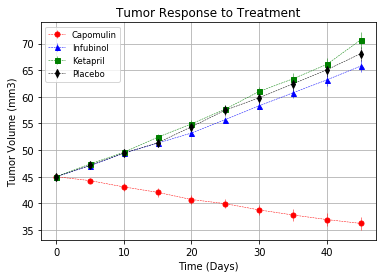

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = combined_data.groupby(("Drug","Timepoint"))["Metastatic Sites"].mean()


# Convert Series  to DataFrame
metastatic_mean_df=metastatic_mean.to_frame()

# Preview DataFrame
metastatic_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [140]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metasite = combined_data.groupby(("Drug","Timepoint"))["Metastatic Sites"].sem()

# Convert to DataFrame
sem_metasite_df = sem_metasite.to_frame()
# Preview DataFrame
sem_metasite_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
# Minor Data Munging to Re-Format the Data Frames
formatted_mean_metasite  = metastatic_mean_df.pivot_table(index = "Timepoint" , columns = "Drug" ,values = "Metastatic Sites")

# Preview that Reformatting worked
formatted_mean_metasite

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


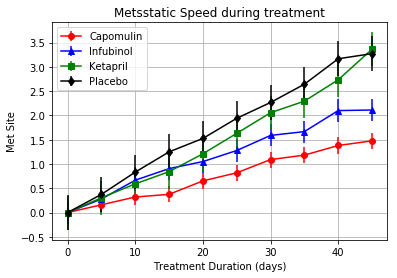

In [24]:

plt.errorbar(formatted_mean_metasite.index, formatted_mean_metasite['Capomulin'] ,
         yerr = formatted_mean_metasite['Capomulin'].sem(),color = 'red',marker = "o" , label = 'Capomulin')
plt.errorbar(formatted_mean_metasite.index, formatted_mean_metasite['Infubinol'] ,
         yerr = formatted_mean_metasite['Infubinol'].sem(),color = 'b',marker = "^",label = 'Infubinol')
plt.errorbar(formatted_mean_metasite.index, formatted_mean_metasite['Ketapril'] ,
         yerr = formatted_mean_metasite['Ketapril'].sem(),color = 'g',marker = "s",label = 'Ketapril')
plt.errorbar(formatted_mean_metasite.index, formatted_mean_metasite['Placebo'] ,
         yerr = formatted_mean_metasite['Placebo'].sem(),color = 'black',marker = "d",label = 'Placebo')

plt.legend(loc =' best')
plt.grid()
plt.title("Metsstatic Speed during treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met Site")
plt.show()

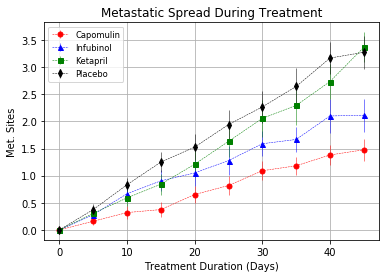

## Survival Rates

In [25]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count  = combined_data.groupby(("Drug","Timepoint"))["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = mouse_count.to_frame().reset_index()
mouse_count_df =mouse_count_df.rename(columns = {"Mouse ID":"Mouse Count"})

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_format = mouse_count_df.pivot_table(index = "Timepoint",columns = "Drug",values ="Mouse Count")
# Preview the Data Frame
mouse_count_format

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


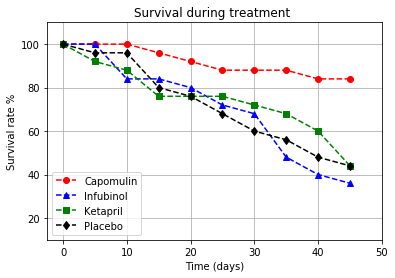

In [28]:
# Generate the Plot (Accounting for percentages)
Capomulin_line = mouse_count_format['Capomulin']/mouse_count_format['Capomulin'].max()*100
Infubinol_line = mouse_count_format['Infubinol']/mouse_count_format['Infubinol'].max()*100
Ketapril_line = mouse_count_format['Ketapril']/mouse_count_format['Ketapril'].max()*100
Placebo_line= mouse_count_format['Placebo']/mouse_count_format['Placebo'].max()*100

Capomulin_line.plot(kind='line',marker ='o', color='red', label="Capomulin",linestyle='--')
Infubinol_line.plot(kind='line',marker ='^', color='b', label="Infubinol",linestyle='--')
Ketapril_line.plot(kind='line',marker ='s', color='g', label="Ketapril",linestyle='--')
Placebo_line.plot(kind='line',marker ='d', color='black', label="Placebo",linestyle='--')

plt.xlim(-2.5,50)
plt.ylim(10,110)
plt.grid()
plt.legend(loc ="best")
plt.xlabel("Time (days)")
plt.ylabel("Survival rate %")
plt.title("Survival during treatment ")
# Save the Figure

# Show the Figure
plt.show()

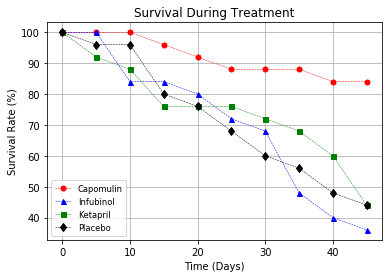

## Summary Bar Graph

In [33]:
# Calculate the percent changes for each drug
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

    
cols = tumor_response_df.columns

summary =100*(tumor_response_df[cols].iloc[-1]/tumor_response_df.iloc[0]-1)  
summary_df =summary.to_frame()

summary_df

,0
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


Text(0,0.5,'% Tumor volume Change ')

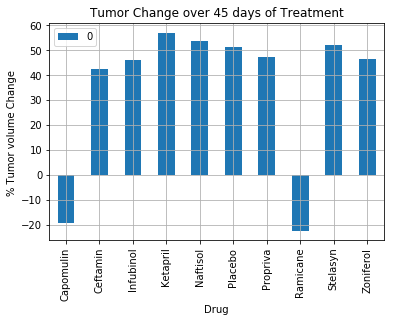

In [37]:
summary_df.plot(kind="bar")
plt.grid()
plt.title("Tumor Change over 45 days of Treatment")
plt.ylabel("% Tumor volume Change ")

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

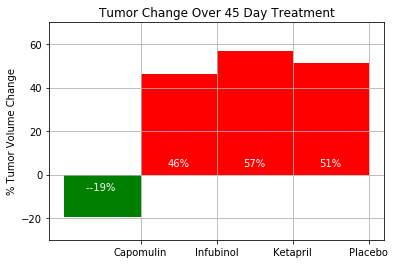